# El polinomio de interpolación

### Miguel A. Piñar. 21 de abril de 2023

En primer lugar importamos las librerías necesarias y definimos los alias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Construimos un array que contiene un conjunto de 6 puntos equiespaciados del intervalo $[-5,5]$.

In [2]:
npun = 6
puntos = np.linspace(-5,5,npun)

In [3]:
puntos

array([-5., -3., -1.,  1.,  3.,  5.])

Definimos la función que vamos a interpolar $$f(x) = \dfrac{1}{1+x^2}$$

In [4]:
def f(x):
    return 1/(1+x**2)

Construimos un array que contiene las imágenes mediante $f$ de 6 puntos equiespaciados del intervalo $[-5,5]$.

In [5]:
imagenes = f(puntos)
imagenes

array([0.03846154, 0.1       , 0.5       , 0.5       , 0.1       ,
       0.03846154])

Construimos una función recursiva que implementa el esquema de Aitken para construir el polinomio de interpolación que interpola a $f$ en el array puntos.

In [6]:
def polinomio(puntos,x):
    n = len(puntos) - 1
    if len(puntos) == 1:
        return f(puntos)
    else:
        puntos1 = np.delete(puntos,[0])
        puntos2 = np.delete(puntos,[n])
        return ((x-puntos[0])*polinomio(puntos1,x)-(x-puntos[n])*polinomio(puntos2,x))/(puntos[n]-puntos[0])
    
        

Evaluamos el polinomio en $x=0$ y comprobamos que realmente interpola

In [7]:
polinomio(puntos,0)

array([0.56730769])

In [8]:
polinomio(puntos, puntos)

array([0.03846154, 0.1       , 0.5       , 0.5       , 0.1       ,
       0.03846154])

Para trazar las gráficos necesitamos un array con muchos puntos (digamos 150) donde evaluar tanto la función como el polinomio de interpolación

In [9]:
npun = 150
xp = np.linspace(-5,5,npun)
yp=f(xp)

Y ahora dibujamos todo junto: función y polinomio de interpolación, en este caso de grado 5

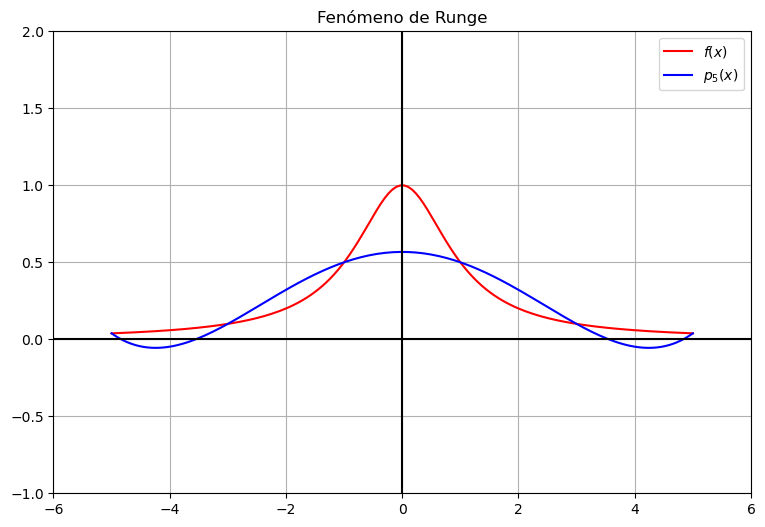

In [11]:
# Polinomio "p5"
n=6
x5=np.linspace(-5,5,n)
y5=polinomio(x5,xp)

plt.figure(figsize=(9,6))
plt.title("Fenómeno de Runge")
plt.plot(xp,yp,'r',label="$f(x)$")
plt.plot(xp,y5,'b',label="$p_{5}(x)$")
plt.legend()
plt.grid()
plt.ylim(-1,2)
plt.xlim(-6,6)
plt.plot([0,0],[-1,2],'k')
plt.plot([-6,6],[0,0],'k')

plt.show()

Igual que el anterior pero con un polinomio de grado 11

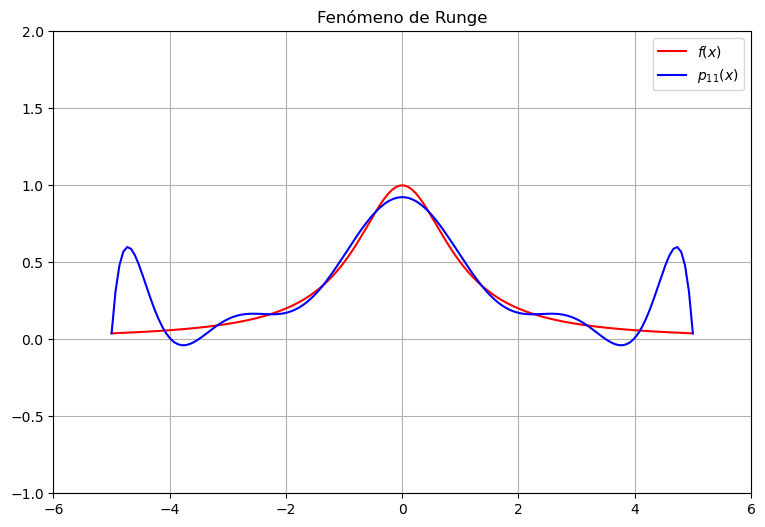

In [12]:
# Polinomio "p11"
n=12
x12=np.linspace(-5,5,n)
y12=polinomio(x12,xp)

plt.figure(figsize=(9,6))
plt.title("Fenómeno de Runge")
plt.plot(xp,yp,'r',label="$f(x)$")
plt.plot(xp,y12,'b',label="$p_{11}(x)$")
plt.legend()
plt.grid()
plt.ylim(-1,2)
plt.xlim(-6,6)

plt.show()

Igual que el anterior pero con un polinomio de grado 17

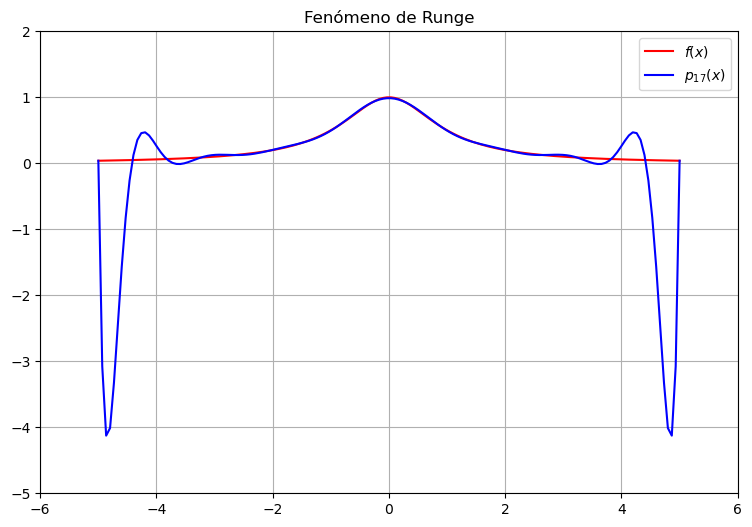

In [14]:
# Polinomio "p17"
n=18
x18=np.linspace(-5,5,n)
y18=polinomio(x18,xp)

plt.figure(figsize=(9,6))
plt.title("Fenómeno de Runge")
plt.plot(xp,yp,'r',label="$f(x)$")
plt.plot(xp,y18,'b',label="$p_{17}(x)$")
plt.legend()
plt.grid()
plt.ylim(-5,2)
plt.xlim(-6,6)

plt.show()